## Two-Pointer

Check out `review/tech_interviews/two-pointer.ipynb` to learn about the two pointer pattern.

## Setup

Install the following packages via pip:

```
pip install geopandas
pip install plotly
pip install pyshp
pip install shapely
pip install plotly-geo
pip install scipy
pip install scikit-learn
```

## EDA

* What exactly is EDA?
* As opposed to discrete steps, EDA is simply the process of poking & prodding your data to see what sorts of insights fall out of it
* Before starting, we want to ensure that the data is properly cleaned & formatted.
* EDA entails:
* Viewing your data
    * Splitting your data into groups
    * Calculating statistics
    * Performing t-tests
    * And most importantly, visualizing your data
In no specific order


In [22]:
import pandas as pd

# load in rental data
# this will not be the only dataframe we interact with! always split your dataframes into further groups
rent_df = pd.read_csv("../data/2020_2021_rent.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 961: invalid start byte

Let's propose a goal for analysis
* view trends in rent
* view trends in population
* view how rent changed from state-to-state 
  * anymore granular?...
* view how rent correlates with population

* business applications? 
  * market-rate and what they can charge
  * trends in population --> market opps

* consumer applications?
  * landlord falsification
  * finding a new place to live. Alaska??? 

In [23]:
# we often run into the errors above. This indicates that there is some non-unicode character in our dataset.
# could be cyrillic, could be expanded latin (accented chars), could be mandarin, etc.

# regardless, we can fix it by switching the encoding.
rent_df = pd.read_csv("../data/2020_2021_rent.csv", encoding = 'unicode_escape')

# any risks to this? ... 

In [25]:
# let's view the first 5 rows to get a sense of the type of data to expect
rent_df.head(6)

,year,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub20,areaname20,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,2020,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,2020,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,2020,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,2020,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,2020,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR
5,2020,7201199999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",11,99999,A¤asco Municipio,A¤asco Municipio,27890,12557,PR


In [26]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         9533 non-null   int64 
 1   fips2010     9533 non-null   int64 
 2   rent50_0     9533 non-null   int64 
 3   rent50_1     9533 non-null   int64 
 4   rent50_2     9533 non-null   int64 
 5   rent50_3     9533 non-null   int64 
 6   rent50_4     9533 non-null   int64 
 7   state        9533 non-null   int64 
 8   cbsasub20    9533 non-null   object
 9   areaname20   9533 non-null   object
 10  county       9533 non-null   int64 
 11  cousub       9533 non-null   int64 
 12  cntyname     9533 non-null   object
 13  name         9533 non-null   object
 14  pop2017      9533 non-null   int64 
 15  hu2017       9533 non-null   int64 
 16  state_alpha  9533 non-null   object
dtypes: int64(12), object(5)
memory usage: 1.2+ MB


In [27]:
# we fix format if necessary, rename columns 
# data munging: prepare for analysis

# consider your goals...

# view trends in rent (which column do we need for this?)
# view trends in population (which column do we need for this as well?)

# view how rent changed from state-to-state (which column is relevant for this?)
  # anymore granular?... (granular data)
# view how rent correlates with population

# looks like we only need to focus in on a few columns for our analysis
rentpop_df = rent_df[["year", "fips2010", "rent50_0", "county", "areaname20", "name", "pop2017", "state_alpha"]]

# drop null values (if relevant)


# view new dataframe
rentpop_df.head()

,year,fips2010,rent50_0,county,areaname20,name,pop2017,state_alpha
0,2020,4805999999,673,59,"Abilene, TX MSA",Callahan County,13660,TX
1,2020,4825399999,673,253,"Abilene, TX MSA",Jones County,19970,TX
2,2020,4844199999,673,441,"Abilene, TX MSA",Taylor County,135370,TX
3,2020,7200399999,386,3,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguada Municipio,39470,PR
4,2020,7200599999,386,5,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguadilla Municipio,55720,PR


In [29]:
# next, we explore the metadata (cols, type, len, missing vals) to understand the struct of our df
rentpop_df.columns

Index(['year', 'fips2010', 'rent50_0', 'county', 'areaname20', 'name',
       'pop2017', 'state_alpha'],
      dtype='object')

In [31]:
# make summary statistics
rentpop_df.describe()

,year,fips2010,rent50_0,county,pop2017
count,9533.000000,9.533000e+03,9533.000000,9533.000000,9.533000e+03
mean,2020.499948,3.044543e+09,723.536347,74.330956,6.825536e+04
std,0.500026,1.505724e+09,279.589952,99.108654,2.677306e+05
min,2020.000000,1.002000e+08,337.000000,1.000000,0.000000e+00
25%,2020.000000,2.107600e+09,539.000000,13.000000,3.985000e+03
50%,2020.000000,2.711000e+09,641.000000,37.000000,1.493500e+04
75%,2021.000000,4.213200e+09,806.000000,105.000000,4.132000e+04
max,2021.000000,7.803100e+09,2447.000000,999.000000,1.010572e+07


In [32]:
# tukey's numbers min, lower quant, median, upper quant, max (http://theurbanengine.com/blog//tukey-5-number-summary)
# let's focus in on the columns of interest (rent & pop?)
rentpop_df[['rent50_0','pop2017']].describe()

,rent50_0,pop2017
count,9533.000000,9.533000e+03
mean,723.536347,6.825536e+04
std,279.589952,2.677306e+05
min,337.000000,0.000000e+00
25%,539.000000,3.985000e+03
50%,641.000000,1.493500e+04
75%,806.000000,4.132000e+04
max,2447.000000,1.010572e+07


In [ ]:
# describe the pop2017 column


In [33]:
# create two dataframes. one describing 2020 data and one describing 2021 data

# filter for 2020
df_2020 = rent_df[rent_df['year'] == 2020]

# filter for 2021
df_2021 = rent_df[rent_df['year'] == 2021]

In [35]:
# summary statistics of rent50 for 2020
df_2020["rent50_0"].describe()

count    4767.000000
mean      709.632893
std       273.928743
min       338.000000
25%       529.000000
50%       625.000000
75%       785.500000
max      2288.000000
Name: rent50_0, dtype: float64

In [36]:
# summary statistics of rent50 for 2021
df_2021["rent50_0"].describe()

count    4766.000000
mean      737.442719
std       284.489672
min       337.000000
25%       547.000000
50%       645.000000
75%       821.000000
max      2447.000000
Name: rent50_0, dtype: float64

2020         AxesSubplot(0.1,0.15;0.363636x0.75)
2021    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

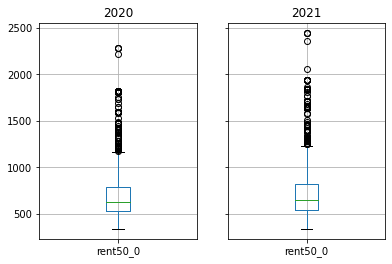

In [37]:
# let's generate some boxplots to beter visualize this
# if we would multiple boxplots according to the value in a row, we must use groupby
# and specify a column
rentpop_df.groupby("year").boxplot(column='rent50_0')

In [ ]:
rentpop_df.groupby("year").boxplot(column='pop2017')

In [ ]:
# look at distributions for your columns of interest, consider if they follow any 
# distribution pattern?
rentpop2020["rent50_0"].plot.hist()

In [ ]:
# make a histogram using only 5 bins
# how do bins change observations?


In [ ]:
# what kind of distribution might this be? 
# https://chartio.com/assets/7fe114/tutorials/charts/histograms/64918b209c6e60b56bee9d8c7ba22dcd854370078e6b8377f272c85119080728/histogram-example-2.png

# generally speaking the more bins you have, the more insight you can glean
rentpop2020["rent50_0"].plot.hist(bins=20)

In [ ]:
# a lot of bins communicate even more info

# how many bins you include is contextual on the purpose of EDA
# find classes/groups of data? Less bins
# analyze continuous data? More bins

rentpop2020["rent50_0"].plot.hist(bins=100)

In [ ]:
# there is a rule we can use however: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

# Python does not have a builtin method for this, but R does (https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram)
# this is why R is usually a go-to for data-analysis

# however, we will make do
# 2 * IQR * len(df)**(-1/3)

first_quart = rentpop2020["rent50_0"].describe()["25%"]
third_quart = rentpop2020["rent50_0"].describe()["75%"]
iqr = third_quart - first_quart

# why do we cast it to an int?
opt_bins = int(2 * iqr * len(rentpop2020["rent50_0"])**(-1/3))
print(opt_bins)

rentpop2020["rent50_0"].plot.hist(bins=opt_bins)

In [ ]:
# calculate the optimal amount of bins according to the  https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule for 2021 and plot



In [ ]:
# calculate the optimal amount of bins according to the  https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule for the entire dataframe (original df containing 2020 & 2021 data) and plot



In [ ]:
# let's see what happens when there are clearly two-classes of data
# load in 2004 rent data
rent2004 = pd.read_csv("../data/2004rent.csv")
# attach to 2021 data
rent_2004_2021 = rentpop2021["rent50_0"].append(rent2004["Rent50_0"])

# what do we notice about this histogram?
rent_2004_2021.plot.hist(bins=100)

In [ ]:
# quickly analyze population
rentpop_df["pop2017"].plot.hist(bins=20)

In [ ]:
# after viewing distributions, let's try to compare correlation between population & rent
rentpop_df.plot.scatter(x="pop2017", y="rent50_0")

In [ ]:
# do the same for 2021 data


In [ ]:
# do the same for 2020 data


In [ ]:
# We could also perform t-tests to view the validity of hypothesis
# null-hypothesis: ...
# alt-hypothesis: ...
# central limit theorem: ...

# we could potentially do a distribution test called the `kolmogorov-smirnov test'
# which is a hypothesis test that checks if some data=sample is normally distributed

# if it is normally distributed, then we have a good dataset to predict on using an explainable model
# such as linear regression

# if it is not normally distributed, then we should probably scale our data to make it normal
# or choose a different model
# or snip outliers

# https://pyshark.com/test-for-normality-using-python/
# https://www.bristol.ac.uk/cmm/media/research/ba-teaching-ebooks/pdf/Normality%20-%20Practical.pdf

# We use the k-s test to check if our distribution matches some other distribution
# for example, normal

# our null-hypothesis is that the distribution is normal
# while our alt-hypothesis is that our distribution is not normal (skewed, possion, uniform)

# keep in mind, that we reject the null-hypothesis if our p-value is less than 0.05

import scipy

scipy.stats.kstest(rentpop_df["rent50_0"], scipy.stats.norm.cdf)


In [ ]:
# and lastly, one more visualization to check for normality
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(rentpop_df["rent50_0"], dist="norm", plot=plt)
plt.show()

While rent data is not normal (harder prediction task), we could apply some transformation tasks to force it to be normal (https://developers.google.com/machine-learning/data-prep/transform/normalization)

We use the transformation that works "empirically" well. Are there any risks to this?

In [ ]:
# generally we normalize columns together. The scale for population and rent is often varied
# ex: rent 635 USD, population 83,000 people. Two different scales

# this is also known as "scaling to range"
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# why do we only focus on these columns?
rentpop2021_reduced = rentpop2021[['rent50_0', 'pop2017']]

rentpop_scaled = pd.DataFrame(scaler.fit_transform(rentpop2021_reduced), columns=rentpop2021_reduced.columns)

rentpop_scaled.head()

In [ ]:
# let's view distribution now via the QQ plot


In [ ]:
# matplotlib is great for making internal plots to share amongst yourselves and collegues
# but in reality we'd much rather prefer something with more pizzazz , or at least more colors
# therefore we use `seaborn`. https://seaborn.pydata.org/
import seaborn as sns 

# boxplots to analyze distribution
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=rentpop_df, x="year", y="rent50_0")


In [ ]:
# filtering your dataframe on only one state and create a boxplot for this state


In [ ]:
# scatter plots to visualize trends
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

# focus on GA & NY
rentpop_south = rentpop_df[
    (rentpop_df["state_alpha"] == 'GA') | 
    (rentpop_df["state_alpha"] == 'NY')
    ]
sns.scatterplot(data=rentpop_south, x="pop2017", y="rent50_0", hue="state_alpha")

In [ ]:
# filter your data on two distinct states and create a scatter plot


In [ ]:
# bar graphs to visualize rank by groups
# https://seaborn.pydata.org/generated/seaborn.barplot.html
means = rentpop_df.groupby("state_alpha").mean()["rent50_0"].reset_index()
sorted_means = means.sort_values(by="rent50_0", ascending=False)

sns.barplot(x="state_alpha", y="rent50_0", data=sorted_means.head(10))

In [ ]:
# lastly, our analysis can get us complex as our goals

pivoted_table  = rentpop2021.merge(rentpop2020, how='left', on=['areaname20', 'county'])
pivoted_table.head()

In [ ]:
# calculate difference from year to year 
pivoted_table["delta_rent"] = pivoted_table["rent50_0_x"] - pivoted_table["rent50_0_y"]

# calc mean difference across state
means_delta = pivoted_table.groupby("state_alpha_x").mean()["delta_rent"].reset_index()

sorted_means_delta = means_delta.sort_values(by="delta_rent", ascending=False)

sns.barplot(x="state_alpha_x", y="delta_rent", data=sorted_means_delta.head(10))


In [ ]:
sns.barplot(x="state_alpha_x", y="delta_rent", data=sorted_means_delta.tail(10))

In [ ]:
# re-consider your goals...

# view trends in rent (which column do we need for this?)
# view trends in population (which column do we need for this as well?)

# view how rent changed from state-to-state (which column is relevant for this?)
  # anymore granular?... (granular data)
# view how rent correlates with population

In [ ]:
# finally do make a plan of action

## NEXT STEPS

## RISKS

## DOCUMENT!

## LOAD BACK IN 

If you'd like to try to create this chloropleth map,  we can run the following code-block.

Keep in mind, this function is deprecated, so we will see how to create this Tableau instead: https://plotly.com/python-api-reference/generated/plotly.figure_factory.create_choropleth.html

In [16]:
import plotly.io as pio
pio.renderers.default='notebook'

import plotly.figure_factory as ff
import pandas as pd

# surpress warnings
import warnings
warnings.filterwarnings("ignore")

rent_df = pd.read_csv("../data/2020_2021_rent.csv", encoding = 'unicode_escape')

# looks like we only need to focus in on a few columns for our analysis
rentpop_df = rent_df[["year", "fips2010", "rent50_0", "county", "areaname20", "name", "pop2017", "state_alpha"]]

rentpop2021 = rentpop_df[rentpop_df["year"] == 2021]

# and lastly, there is an entire field simply dedicated to plotting geographic data
# GIS: https://www.cdc.gov/gis/what-is-gis.htm

# get first 5 digits of each fip_code
fip_code = list(rentpop2021["fips2010"])
str_fip = [str(fip)[:5] for fip in fip_code]

# we can simulate this via plotly
fig = ff.create_choropleth(fips=str_fip, values=list(rentpop2021["rent50_0"]))
fig.update_layout(showlegend=False)
fig.show()

In [17]:
# a more interesting visualization would perhaps be the `delta` or the `difference` in rent prices ... 
rentpop2020 = rentpop_df[rentpop_df["year"] == 2020]
pivoted_table  = rentpop2021.merge(rentpop2020, how='left', on=['areaname20', 'county'])
pivoted_table.head()

,year_x,fips2010_x,rent50_0_x,county,areaname20,name_x,pop2017_x,state_alpha_x,year_y,fips2010_y,rent50_0_y,name_y,pop2017_y,state_alpha_y
0,2021,4805999999,761,59,"Abilene, TX MSA",Callahan County,13660,TX,2020.0,4.806000e+09,673.0,Callahan County,13660.0,TX
1,2021,4825399999,761,253,"Abilene, TX MSA",Jones County,19970,TX,2020.0,4.825400e+09,673.0,Jones County,19970.0,TX
2,2021,4844199999,761,441,"Abilene, TX MSA",Taylor County,135370,TX,2020.0,4.844200e+09,673.0,Taylor County,135370.0,TX
3,2021,7200399999,401,3,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguada Municipio,39470,PR,2020.0,7.200400e+09,386.0,Aguada Municipio,39470.0,PR
4,2021,7200599999,401,5,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguadilla Municipio,55720,PR,2020.0,7.200600e+09,386.0,Aguadilla Municipio,55720.0,PR


In [ ]:
pivoted_table["delta"] = pivoted_table["rent50_0_x"] - pivoted_table["rent50_0_y"]

fip_code = list(pivoted_table["fips2010_x"])
str_fip = [str(fip)[:5] for fip in fip_code]
pivoted_table["delta"]

In [ ]:
# plot differences via ...
fig = ff.create_choropleth(fips=str_fip, values=list(pivoted_table["delta"]))
fig.show()

# should work ... needs debugging